In [36]:
import numpy as np 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


In [37]:
# from google.colab import files 
# file = files.upload()

In [38]:
dataset = pd.read_csv('../datasets/original/dataset.csv')
dataset.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 31, 2022","23,303.4","23,634.2","24,179.3","23,236.2",138.84K,-1.40%
1,"Jul 30, 2022","23,634.2","23,774.2","24,605.3","23,521.8",168.72K,-0.59%
2,"Jul 29, 2022","23,774.3","23,850.2","24,340.0","23,451.4",221.66K,-0.32%
3,"Jul 28, 2022","23,850.0","22,957.7","24,190.5","22,611.6",268.32K,3.88%
4,"Jul 27, 2022","22,958.3","21,248.0","23,027.8","21,047.5",242.66K,8.05%


In [39]:
dataset.isnull().sum() / len(dataset)

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [40]:
dataset.drop(['Date', 'Vol.', 'Change %'],1, inplace = True)

In [41]:
dataset.head(5)

,Price,Open,High,Low
0,"23,303.4","23,634.2","24,179.3","23,236.2"
1,"23,634.2","23,774.2","24,605.3","23,521.8"
2,"23,774.3","23,850.2","24,340.0","23,451.4"
3,"23,850.0","22,957.7","24,190.5","22,611.6"
4,"22,958.3","21,248.0","23,027.8","21,047.5"


In [42]:
prediction_days = 30 
print(dataset.count())
dataset["Prediction"] = dataset[["Price"]].shift(-prediction_days)
dataset.dropna(inplace=True)


Price    1308
Open     1308
High     1308
Low      1308
dtype: int64


In [43]:
dataset.head(5)

,Price,Open,High,Low,Prediction
0,"23,303.4","23,634.2","24,179.3","23,236.2","19,262.9"
1,"23,634.2","23,774.2","24,605.3","23,521.8","19,926.6"
2,"23,774.3","23,850.2","24,340.0","23,451.4","20,111.3"
3,"23,850.0","22,957.7","24,190.5","22,611.6","20,278.0"
4,"22,958.3","21,248.0","23,027.8","21,047.5","20,730.2"


In [44]:
# create the independent dataset

# convert the dataset into numpy array
x = np.array(dataset.drop(["Prediction"], 1))

# Remove the last 30
x = x[:len(dataset)-prediction_days]


# remove comma in every element
for key, i in enumerate(x):
  for index, j in enumerate(i):
    j = j.replace(",", "")

    j = float(j)  # convert to float
    i[index] = j  # assigned the value

  x[key] = i  # assign the value to the key

print(x)


[[23303.4 23634.2 24179.3 23236.2]
 [23634.2 23774.2 24605.3 23521.8]
 [23774.3 23850.2 24340.0 23451.4]
 ...
 [3715.9 3809.7 3828.4 3681.8]
 [3809.5 3823.2 3836.6 3789.7]
 [3823.1 3821.9 3843.2 3783.6]]


In [45]:
# create dependent dataset 
y = np.array(dataset["Prediction"])

# get all of the value except the last 30 row 
y = y[:-prediction_days]
print(y)

['19,262.9' '19,926.6' '20,111.3' ... '3,502.5' '3,467.9' '3,437.2']


In [46]:
y = y.reshape(-1,1)
print(y)

[['19,262.9']
 ['19,926.6']
 ['20,111.3']
 ...
 ['3,502.5']
 ['3,467.9']
 ['3,437.2']]


In [47]:
# remove comma in every element
for m in y :
  for n in m : 
    n = n.replace(",","")
     
    n = float(n) # convert to float
    m[0] = n # assigned the value
print(y)

[[19262.9]
 [19926.6]
 [20111.3]
 ...
 [3502.5]
 [3467.9]
 [3437.2]]


In [48]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 1)

print(x_train.shape)
print(x_test.shape)

(998, 4)
(250, 4)


In [49]:
# set the prediction_days_array equal to the last 30 rows from the origianl dataset 
prediction_days_array = np.array(dataset.drop(["Prediction"],1))[-prediction_days:]
print(prediction_days_array)

[['3,821.9' '3,816.7' '3,855.8' '3,816.4']
 ['3,816.6' '3,814.6' '3,883.7' '3,783.3']
 ['3,814.6' '3,810.3' '3,836.4' '3,701.9']
 ['3,810.3' '3,833.5' '3,845.5' '3,775.0']
 ['3,833.7' '3,755.7' '3,870.7' '3,753.8']
 ['3,755.2' '4,120.5' '4,194.2' '3,738.7']
 ['4,120.4' '3,965.2' '4,152.6' '3,939.4']
 ['3,965.2' '3,937.4' '3,983.1' '3,931.7']
 ['3,936.6' '3,972.0' '4,011.5' '3,909.2']
 ['3,972.4' '3,914.3' '3,983.6' '3,881.2']
 ['3,914.3' '3,896.4' '3,993.8' '3,863.7']
 ['3,896.0' '3,664.2' '3,903.7' '3,655.1']
 ['3,664.2' '3,616.8' '3,689.9' '3,607.9']
 ['3,616.8' '3,604.7' '3,641.9' '3,599.7']
 ['3,604.7' '3,592.6' '3,648.3' '3,581.4']
 ['3,592.6' '3,611.5' '3,624.5' '3,580.2']
 ['3,611.5' '3,632.0' '3,663.5' '3,599.2']
 ['3,632.0' '3,631.8' '3,656.4' '3,594.4']
 ['3,631.8' '3,678.8' '3,681.1' '3,623.8']
 ['3,679.0' '3,661.0' '3,680.6' '3,617.1']
 ['3,661.4' '3,661.6' '3,675.3' '3,633.2']
 ['3,661.7' '3,397.3' '3,721.1' '3,382.5']
 ['3,397.7' '3,404.9' '3,421.8' '3,390.3']
 ['3,404.3'

# Linear Regression Model

In [50]:
# Build the model 
linear_regression = LinearRegression()

In [51]:
model = linear_regression.fit(x_train, y_train)

In [52]:
# find intercept and slope ( coefficient )
Q_0 = model.intercept_
print(Q_0)

Q_1 = model.coef_
print(Q_1)

[774.82766333]
[[-1.01611486  0.45887425  0.79689868  0.70695375]]


In [53]:
Linear_prediction = model.predict(x_test)
print(Linear_prediction)

[[ 6141.92034246]
 [11839.09889243]
 [ 9503.93592411]
 [37063.07164234]
 [49330.86745676]
 [44647.85117161]
 [62309.64048696]
 [38563.449013  ]
 [57806.24507804]
 [59794.37902839]
 [ 7967.25408405]
 [40121.41696988]
 [11064.15673513]
 [ 7752.92563026]
 [35327.28531727]
 [ 8898.28641738]
 [ 6800.85181605]
 [46682.14573001]
 [ 9368.89816203]
 [ 8659.85414619]
 [ 5565.49072348]
 [11686.53887668]
 [35999.57524382]
 [10193.94802848]
 [ 5449.04962868]
 [45738.51007805]
 [43767.71312014]
 [ 5722.61771902]
 [10353.81623776]
 [12970.95125831]
 [ 9065.82444679]
 [ 7583.14857621]
 [ 8882.20852403]
 [28513.87760937]
 [38558.83048255]
 [ 7947.62161042]
 [11131.59396006]
 [17735.42184685]
 [ 4774.70208983]
 [50135.87352753]
 [47504.39094819]
 [ 6376.18051386]
 [36960.27857737]
 [ 7745.55647499]
 [11004.24649537]
 [ 8359.81308219]
 [ 7521.86467027]
 [ 7842.58038938]
 [ 4583.29643663]
 [35701.4772376 ]
 [59151.16952609]
 [40074.23197625]
 [33898.67124607]
 [28135.12220962]
 [44457.3597684 ]
 [10557.45

In [54]:
Actual_value = y_test.reshape(-1)
Linear_prediction = Linear_prediction.reshape(-1)

In [55]:
my_datasets = pd.DataFrame({"Linear_Prediction" : Linear_prediction, "Actual Value" : Actual_value })
print(my_datasets)

     Linear_Prediction Actual Value
0          6141.920342       9655.7
1         11839.098892       9387.3
2          9503.935924       7488.5
3         37063.071642      48963.6
4         49330.867457      63273.2
..                 ...          ...
245       45663.321228      63597.9
246        5826.725202       3994.7
247        9844.735274       8706.2
248        9108.662677      10162.5
249        9535.611817       6850.9

[250 rows x 2 columns]


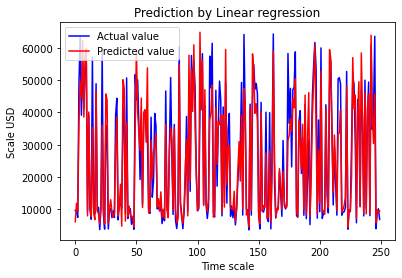

In [56]:
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="b")
plt.plot(Linear_prediction, label = "Predicted value", color ="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, r2_score
result = model.score(x_test, y_test)
print("The accuracy between actual and predicted is:",result)
print("The R2 score is:",r2_score(y_test, Linear_prediction))

The accuracy between actual and predicted is: 0.8592859124922206
The R2 score is: 0.8592859124922206


# Decision Tree 

In [58]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor().fit(x_train, y_train)

In [59]:
DecisionTree_Prediction = model.predict(x_test)

In [60]:
my_datasets = pd.DataFrame({"Decision_Prediction" : DecisionTree_Prediction, "Actual Value" : Actual_value })
print(my_datasets)

     Decision_Prediction Actual Value
0                 5307.8       9655.7
1                 9135.3       9387.3
2                 9199.1       7488.5
3                18546.0      48963.6
4                53730.9      63273.2
..                   ...          ...
245              37646.8      63597.9
246               4859.3       3994.7
247               9888.7       8706.2
248               5493.8      10162.5
249               9177.0       6850.9

[250 rows x 2 columns]


In [61]:
from sklearn.metrics import r2_score
score = r2_score(y_test, DecisionTree_Prediction)
print(score)
print("Accuracy", model.score(x_test, y_test))

0.7949364702297164
Accuracy 0.7949364702297164


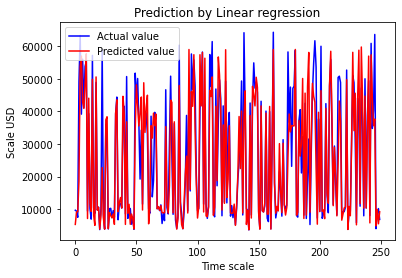

In [62]:
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="b")
plt.plot(DecisionTree_Prediction, label = "Predicted value", color ="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()

# SVR 

In [63]:
from sklearn.svm import SVR

Radial Basis Function Kernel

In [64]:
rbf_SVR = SVR(kernel = 'rbf', C = 1e3, gamma = 0.0000001).fit(x_train, y_train)
rbf_SVR_predicted = rbf_SVR.predict(x_test)

/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
from sklearn.metrics import accuracy_score, r2_score
result3 = rbf_SVR.score(x_test, y_test)
print("The accuracy in RBF:", result3)
print("The R2 score in RBF:", r2_score(y_test, rbf_SVR_predicted))

The accuracy in RBF: 0.8260061359206088
The R2 score in RBF: 0.8260061359206088


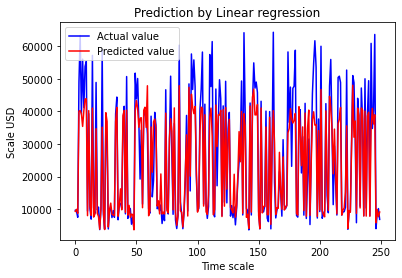

In [66]:
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="b")
plt.plot(rbf_SVR_predicted, label = "Predicted value", color ="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()

Polynomial Kernel

In [67]:
poly_SVR = SVR(kernel = 'poly', C = 1000.0, degree = 2).fit(x_train, y_train)
poly_SVR_predicted = poly_SVR.predict(x_test)

/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
from sklearn.metrics import accuracy_score
result2 = poly_SVR.score(x_test, y_test)
print("The accuracy in Poly:", result2)

The accuracy in Poly: 0.7325915628608674


Linear Kernel

In [69]:
lin_SVR = SVR(kernel = 'linear', C = 1e3).fit(x_train, y_train)
lin_SVR_predicted = lin_SVR.predict(x_test)

/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [70]:
from sklearn.metrics import accuracy_score
result1 = lin_SVR.score(x_test, y_test)
print("The accuracy in Linear:", result1)

The accuracy in Linear: -765.7038285105955
